<a href="https://colab.research.google.com/github/Meetsud/bootcamp2/blob/main/Basic_Deep_Learning_CaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Insalling TensorFlow
!pip install tensorflow


In [ ]:
# importing the libaries

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
# importing the data
df = pd.read_csv('bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
'''
age: The age of the customer. (Numerical)
job: The occupation/employment status of the customer. (Categorical)
Marital Status: The marital status of the customer.
Education: The education level of the customer.
Default: Whether or not the customer has credit in default.
Balance: The balance of the customer's account.
Housing Loan: Whether or not the customer has a housing loan.
Contact Communication Type: The method used to contact the customer (e.g., telephone, cellular).
Day: The day of the month when the last contact with the customers was made.
Duration: The duration (in seconds) of the current visit.
Campaign Contacts Count: Number of contacts performed during this campaign for each customer
-pdays : number days passed since previously contacted form previous camapign
-poutcome : outcome from previous marketing campaign
'''

"\nage: The age of the customer. (Numerical)\njob: The occupation/employment status of the customer. (Categorical)\nMarital Status: The marital status of the customer.\nEducation: The education level of the customer.\nDefault: Whether or not the customer has credit in default.\nBalance: The balance of the customer's account.\nHousing Loan: Whether or not the customer has a housing loan.\nContact Communication Type: The method used to contact the customer (e.g., telephone, cellular).\nDay: The day of the month when the last contact with the customers was made.\nDuration: The duration (in seconds) of the current visit.\nCampaign Contacts Count: Number of contacts performed during this campaign for each customer\n-pdays : number days passed since previously contacted form previous camapign\n-poutcome : outcome from previous marketing campaign\n"

In [ ]:
# Dropping the 'duration' column
df.drop('duration', axis = 1, inplace = True)

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,2,-1,0,unknown,yes


In [ ]:
# Getting an idea about the proportion of values in the target variable
df['deposit'].value_counts()

,count
deposit,
no,5873
yes,5289


In [ ]:
# We have almost equal amount of data from class 0 and 1

In [ ]:
# Encode the target variable
df['deposit'] = df['deposit'].map({'yes' : 1, 'no' : 0})

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1,-1,0,unknown,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1,-1,0,unknown,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,1,-1,0,unknown,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,2,-1,0,unknown,1


In [ ]:
# separating input features and target variable
X = df.drop('deposit', axis = 1)
y = df['deposit']

In [ ]:
# encode the categorical columns using pd.get_dummies()
categorical_cols = X.select_dtypes(include = ['object']).columns
X = pd.get_dummies(X, columns = categorical_cols, drop_first = True)

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform (X)

In [ ]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 5)

In [ ]:
# Build the Deep Learning Model
model = Sequential()
model.add (Dense(32, activation = 'relu', input_dim = X_train.shape[1]))
model.add (Dense(16, activation = 'relu'))
model.add (Dense (1, activation = 'sigmoid'))

In [ ]:
# Compiling the model
model.compile(loss = 'binary_crossentropy', optimizer = 'SGD', metrics = ['accuracy'])

In [ ]:
'''
Compiling the model -› setting the strategy for learning
(1) loss function -› This given' an idea about the error in the model
(2) optimizer -› controls how the model learns by adjusting the weights during backward propogation
(3) metrics -> what should be reported diuring the training phasel
'''

In [ ]:
# Training the model
history = model.fit(X_train, y_train, validation_split = 0.1, epochs = 50, batch_size = 32, verbose = 1)

Epoch 1/50
503/503 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5542 - loss: 0.6904 - val_accuracy: 0.6383 - val_loss: 0.6426
Epoch 2/50
503/503 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6736 - loss: 0.6130 - val_accuracy: 0.6730 - val_loss: 0.6224
Epoch 3/50
503/503 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6893 - loss: 0.5957 - val_accuracy: 0.6741 - val_loss: 0.6129
Epoch 4/50
503/503 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7021 - loss: 0.5738 - val_accuracy: 0.6898 - val_loss: 0.6091
Epoch 5/50
503/503 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7124 - loss: 0.5699 - val_accuracy: 0.6842 - val_loss: 0.6040
Epoch 6/50
503/503 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7149 - loss: 0.5634 - val_accuracy: 0.6887 - val_loss: 0.5998
Epoch 7/50
503/503 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7282 - loss: 0.5581 - val_accuracy: 0.6909 - val_loss: 0.5986
Epoch 8/50
503/503 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7155 - loss: 0.5614 - val_accuracy: 0.

In [ ]:
'''
Training Accuracy -> 74.76%
Validation Accuracy -> 70.10%
Training and Validation performance are within 5% of each other.
Also, both the performance values are above 70%
'''

In [ ]:
# Evaluate the model on testing dataset
loss, accuracy = model. evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy: .4f}')

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6994 - loss: 0.5943
Test Loss: 0.5900
Test Accuracy:  0.7049


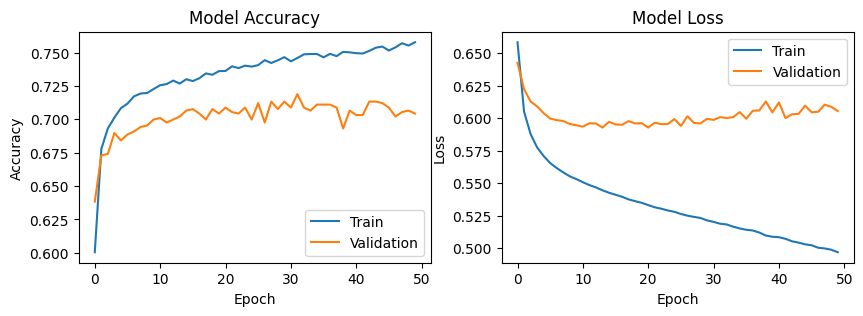

In [ ]:
# Plots
import matplotlib.pyplot as plt
import seaborn as sns

# Accuracy Plot
plt.figure(figsize = (10, 3))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc = 'upper right')
plt.show()